# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [26]:
import pandas as pd

sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

print("Vendite maggiori di 10:")
print(sales[sales['sales'] > 10])

print("Dati del 2018")
print(sales[sales['year'] == 2018])

print("Vendite maggiiori di 13, del 2018:")
print(sales[(sales['sales'] > 13) & (sales['year'] == 2018)])

print("Escludo i casi maggiori di 13 del 2018:")
print(sales[(sales['sales'] <= 13) | (sales['year'] != 2018)])

print("Vendite che diviso 3 sono maggiori di 3:")
print(sales[(sales['sales'] / 3) > 3])

print("Nomi domo la J:")
print(sales[sales['employee'].str[0] > 'J'])


Vendite maggiori di 10:
  employee  sales  year
0  Katrina     14  2018
1   Guanyu     17  2019
3    Roman     12  2018
7   Alaina     15  2020
Dati del 2018
  employee  sales  year
0  Katrina     14  2018
3    Roman     12  2018
Vendite maggiiori di 13, del 2018:
  employee  sales  year
0  Katrina     14  2018
Escludo i casi maggiori di 13 del 2018:
     employee  sales  year
1      Guanyu     17  2019
2         Jan      6  2020
3       Roman     12  2018
4  Jacqueline      8  2020
5       Paola      3  2019
6   Esperanza      7  2019
7      Alaina     15  2020
8      Egweyn      5  2020
Vendite che diviso 3 sono maggiori di 3:
  employee  sales  year
0  Katrina     14  2018
1   Guanyu     17  2019
3    Roman     12  2018
7   Alaina     15  2020
Nomi domo la J:
  employee  sales  year
0  Katrina     14  2018
3    Roman     12  2018
5    Paola      3  2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot 
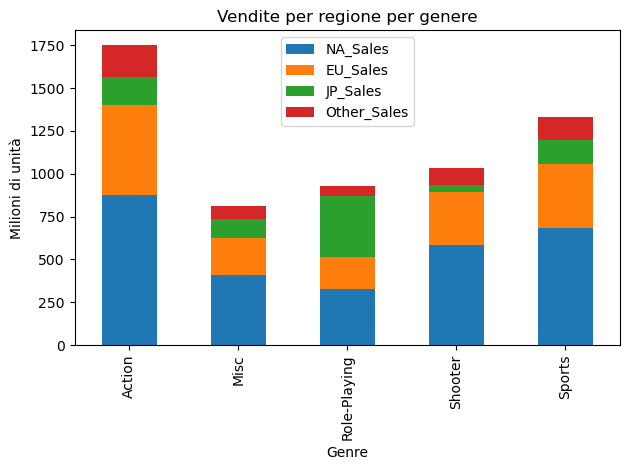


In [27]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Numero di videogiochi pubblicati:
11493


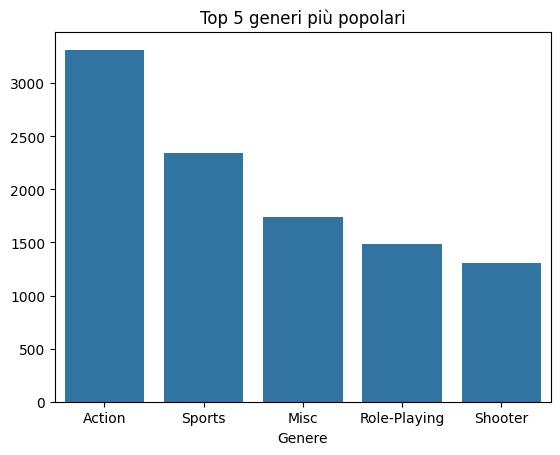

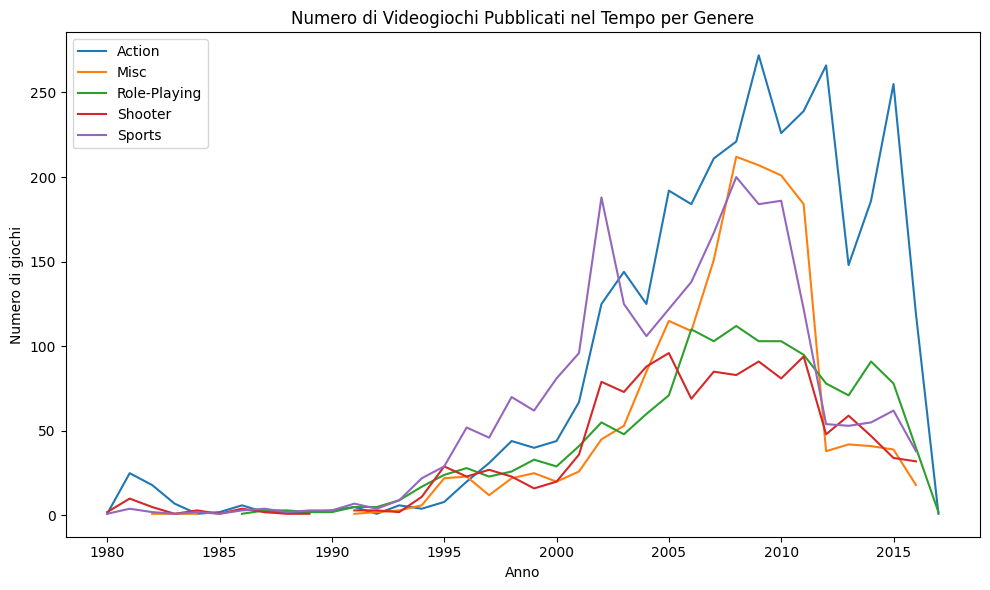

Genre
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Global_Sales, dtype: float64


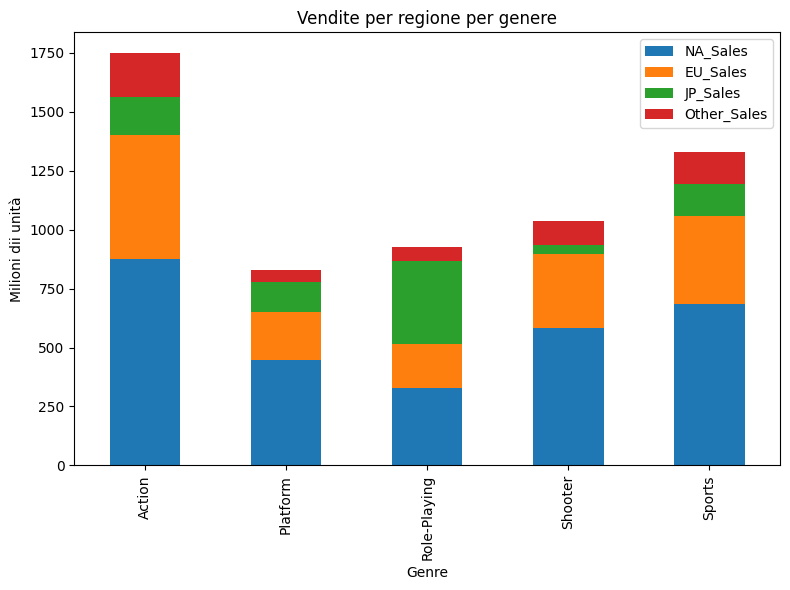

In [ ]:
print("Numero di videogiochi pubblicati:")
print(df['Name'].nunique())


## Plot generi più popolari ##
# Raggruppo i 5 generi più comuni
top5 = df['Genre'].value_counts().head(5)
generi = top5.index
counts = top5.values

# Dataframe contenente i dati per il plot
plot_df = pd.DataFrame({'Genre': generi, 'Count': counts})

# Barplot
sns.barplot(data=plot_df, x=generi, y=counts)
plt.title("Top 5 generi più popolari")
plt.xlabel("Genere")
plt.show()


## Plot numero di videogiochi nel tempo ##
# Raggruppo il numero di giochi per Anno e Genere
grouped = df.groupby(['Year', 'Genre']).size().reset_index(name='Count')

# Estraggo i top 5 generi
grouped = grouped[grouped['Genre'].isin(generi)]

# Pivot per avere un formato adatto al line plot
pivot_df = grouped.pivot(index='Year', columns='Genre', values='Count')

# Plot a linee
pivot_df.plot(kind='line', figsize=(10, 6))
plt.title('Numero di Videogiochi Pubblicati nel Tempo per Genere')
plt.xlabel('Anno')
plt.ylabel('Numero di giochi')
plt.legend()
plt.tight_layout()
plt.show()


## Vendite per regioine per genere ##
top5_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5)
generi = top5_sales.index

# Filtro il dataframe per i top 5 generi
df_top = df[df['Genre'].isin(generi)]

# Raggruppo per genere e sommo le vendite per regione
region_sales = df_top.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Barplot
region_sales.plot(kind='bar', stacked=True, figsize=(8,6))

plt.title("Vendite per regione per genere")
plt.xlabel("Genre")
plt.ylabel("Milioni dii unità")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()




